In [1]:
#%pip install fredapi > /dev/null
#%pip install plotly > /dev/null

# Exploratory Data Analysis of FRED Economic Data                                                                             
                                                                                                                                
This notebook conducts an exploratory data analysis (EDA) of economic data obtained from the Federal Reserve Economic Data (FRED)
database using the `fredapi`. The analysis focuses on retrieving, visualizing, and comparing key economic indicators such as the S&P
500 index and unemployment rates at both national and state levels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import os       
from dotenv import load_dotenv
import fredapi as Fred


plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

#load env variables
load_dotenv()

fred_key=os.environ["fred_api_key"]

## 1. Setup and API Initialization

First, we import the necessary libraries and initialize the FRED API with a key to fetch the data.

In [3]:
#fred = Fred(api_key=fred_key)
fred = Fred.Fred(api_key=fred_key)

## 2. Search for S&P 500 Data

We can use the `search()` method to find relevant economic data series. Here, we search for the S&P 500 index to find its series ID.


In [4]:
sp_search = fred.search('S&P', limit=1500, order_by='popularity', sort_order='desc')

In [5]:
sp_search.shape

(1500, 15)

In [6]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-09-01,2025-09-01,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-08-28,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-08-29 09:04:09-05:00,97,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2025-09-01,2025-09-01,S&P 500,2015-08-31,2025-08-29,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-08-29 19:02:11-05:00,89,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2025-09-01,2025-09-01,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2025-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-08-26 08:12:01-05:00,86,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-09-01,2025-09-01,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-08-28,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-08-29 09:04:13-05:00,85,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-09-01,2025-09-01,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-08-28,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-08-29 10:24:02-05:00,82,The ICE BofA Option-Adjusted Spreads (OASs) ar...


## 3. Retrieve and Visualize S&P 500 Data

Using the series ID 'SP500', we retrieve the data and plot it to visualize its historical performance.


In [7]:
sp500 = fred.get_series(series_id='SP500')

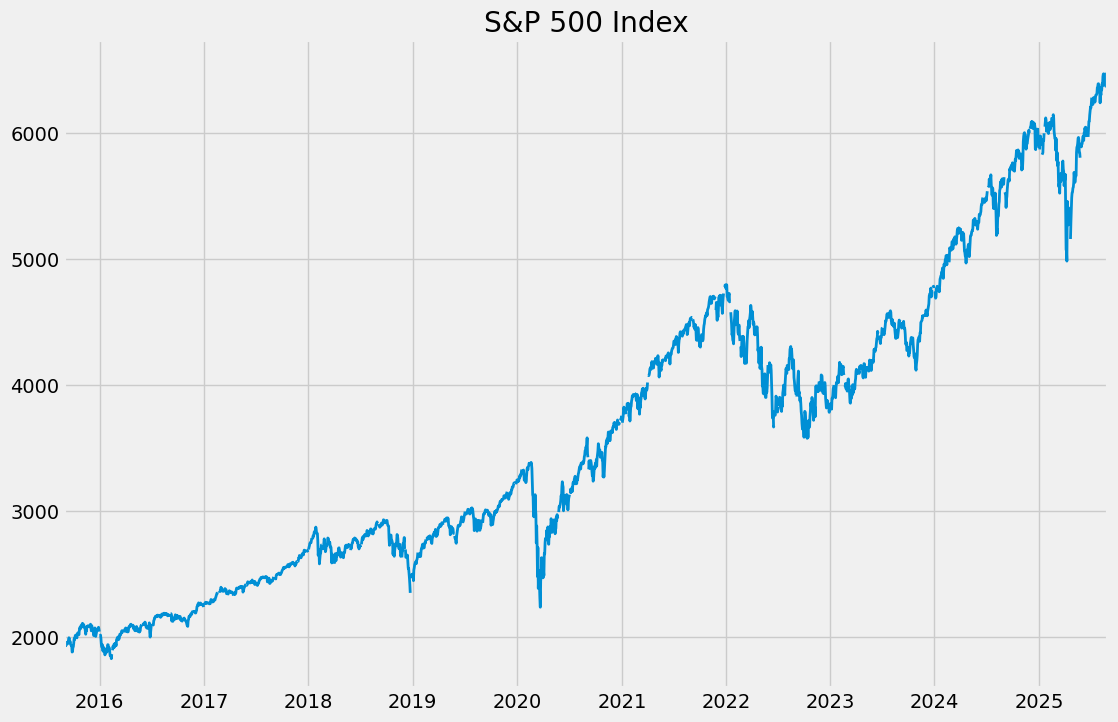

In [8]:
sp500.plot(figsize=(12,8), title='S&P 500 Index', lw=2, color=color_pal[0]);

## 4. Analyze Unemployment Data

Next, we'll analyze unemployment data, starting with the national rate and then looking at a state-level breakdown.

In [9]:
#Get Unemployment Rate sample data use search and get_series.
unemployment = fred.search('unemployment')
unemployment.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-09-01,2025-09-01,Unemployment Rate,1948-01-01,2025-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-08-01 07:49:04-05:00,96,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-09-01,2025-09-01,Unemployment Rate,1948-01-01,2025-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-08-01 07:46:03-05:00,58,The unemployment rate represents the number of...
CCSA,CCSA,2025-09-01,2025-09-01,Continued Claims (Insured Unemployment),1967-01-07,2025-08-16,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2025-08-28 07:33:05-05:00,77,"Continued claims, also referred to as insured ..."
CCNSA,CCNSA,2025-09-01,2025-09-01,Continued Claims (Insured Unemployment),1967-01-07,2025-08-16,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2025-08-28 07:33:09-05:00,48,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2025-09-01,2025-09-01,Unemployment Level,1948-01-01,2025-07-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-08-01 07:49:04-05:00,71,The series comes from the 'Current Population ...


In [10]:
unrate = fred.get_series('UNRATE')
unrate.head()

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
dtype: float64

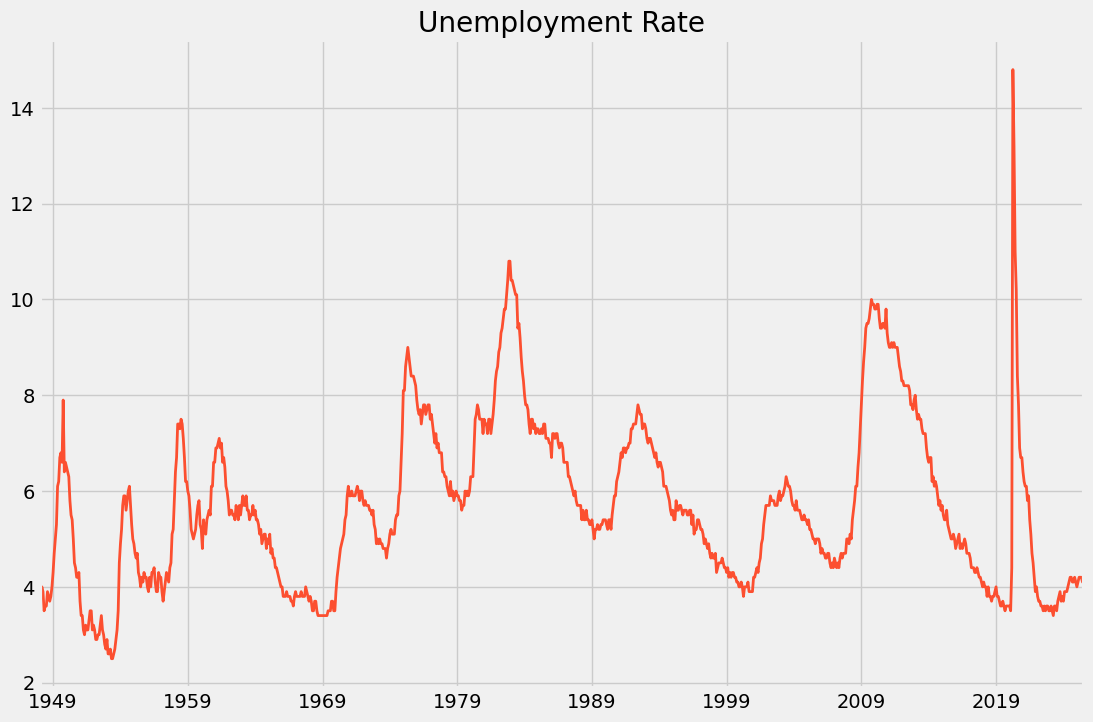

In [11]:
unrate.plot(figsize=(12,8), title='Unemployment Rate', lw=2, color=color_pal[1]);

In [12]:
#Let's look at state level unemployment data and filter it down to just the seasonally adjusted unemployment rate data.
#filter for rows that have length of id is 4 characters

#unemployment_df = fred.search('unemployment rate state', limit=1000, order_by='popularity', sort_order='asc')
#sorted_by_state_df = unemployment_df.sort_values(by='title')
#print(sorted_by_state_df.head())
#unemployment_df_filtered = unemployment_df[unemployment_df['id'].str.len() == 4].copy()
#unemployment_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
#unemployment_df = unemployment_df.loc[unemployment_df['title'].str.contains('Unemployment Rate')]


In [13]:

#drop unnecessary rows where series_id is greater than 4 characters
#drop rows where id length is not equal to 4
#unemployment_df_filtered = unemployment_df[unemployment_df['id'].str.len() == 4].copy()

#print(f"Original dataframe shape: {unemployment_df.shape}")
#print(f"Filtered dataframe shape: {unemployment_df_filtered.shape}")
#unemployment_df = unemployment_df.loc[unemployment_df['id'].str.len() == 4]


In [14]:
#unemployment_df_filtered

In [15]:
#all_results = []

#for myid in unemployment_df_filtered.index:
#    results = fred.get_series(myid)
#    results = results.to_frame(name=myid)
#    all_results.append(results)

In [16]:
#create a px line chart for all_results
#all_states_unemployment = pd.concat(all_results, axis=1)
#all_states_unemployment.columns = unemployment_df_filtered['title'].str.replace('Unemployment Rate in', '').values
#all_states_unemployment.index = pd.to_datetime(all_states_unemployment.index)
#all_states_unemployment.head()


In [17]:
#plotly express to create an interactive plot for all states
#px.line(all_states_unemployment)

Last 5 months of unemployment data by state:
             AL   AK   AZ   AR   CA   CO   CT   DE   FL   GA   HI   ID   IL  \
2025-03-01  3.3  4.7  4.1  3.7  5.3  4.8  3.6  3.7  3.6  3.6  2.9  3.7  4.8   
2025-04-01  3.3  4.7  4.1  3.7  5.3  4.8  3.7  3.9  3.7  3.6  2.9  3.7  4.8   
2025-05-01  3.3  4.7  4.1  3.7  5.3  4.8  3.8  4.0  3.7  3.5  2.8  3.6  4.8   
2025-06-01  3.2  4.7  4.1  3.7  5.4  4.7  3.8  4.0  3.7  3.5  2.8  3.6  4.6   
2025-07-01  3.0  4.8  4.1  3.7  5.5  4.5  3.8  4.1  3.7  3.4  2.7  3.7  4.6   

             IN   IA   KS   KY   LA   ME   MD   MA   MI   MN   MS   MO   MT  \
2025-03-01  4.1  3.4  3.8  5.2  4.4  3.5  3.0  4.4  5.5  3.1  3.9  3.8  2.7   
2025-04-01  3.9  3.5  3.8  5.2  4.4  3.5  3.1  4.6  5.5  3.2  4.0  3.9  2.7   
2025-05-01  3.7  3.6  3.8  5.0  4.5  3.4  3.2  4.8  5.4  3.3  4.0  4.0  2.8   
2025-06-01  3.6  3.7  3.8  4.9  4.5  3.3  3.3  4.8  5.3  3.3  4.0  4.0  2.8   
2025-07-01  3.6  3.7  3.8  4.9  4.5  3.2  3.4  4.8  5.3  3.5  4.0  4.1  2.8   

     

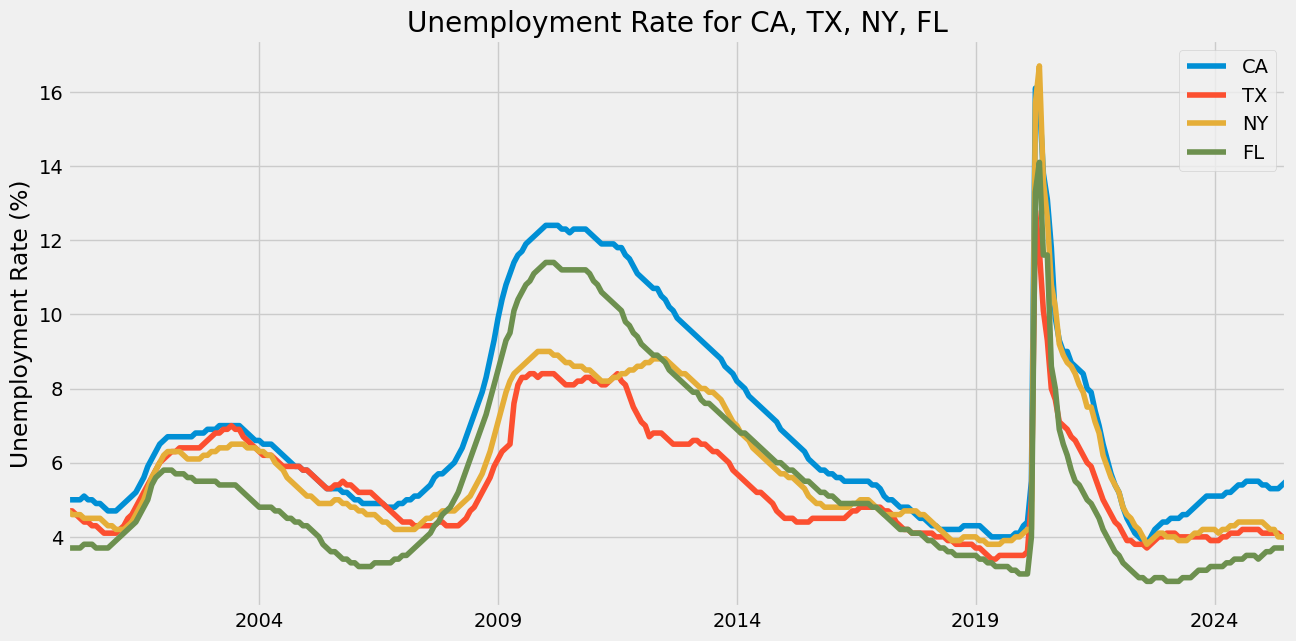

In [18]:
# Create a list of all state abbreviations
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# Create an empty DataFrame to store the unemployment data
all_states_unemployment = pd.DataFrame()
# Loop through each state, create the series ID, and fetch the data
for state in states:
     series_id = f'{state}UR'
     try:
         # Fetch data starting from Jan 1, 2000
         state_unemployment = fred.get_series(series_id, observation_start='2000-01-01')
         all_states_unemployment[state] = state_unemployment
     except Exception as e:
         print(f"Could not retrieve data for {state}: {e}")

# Display the last 5 rows of the DataFrame
print("Last 5 months of unemployment data by state:")
print(all_states_unemployment.tail())
# Plot the data for a few states to visualize it
all_states_unemployment[['CA', 'TX', 'NY', 'FL']].plot(figsize=(14, 7), title='Unemployment Rate for CA, TX, NY, FL')
plt.ylabel('Unemployment Rate (%)')
plt.show()

In [19]:
#pull April 2020 unemployment rate per state and create a bar chart
april_2020 = all_states_unemployment.loc['2020-04-01']
april_2020 = april_2020.sort_values(ascending=False)
px.bar(april_2020, title='Unemployment Rate by State - April 2020', labels={'index': 'State', 'value': 'Unemployment Rate (%)'})

   ## 5. Conclusion
   
   This notebook demonstrated how to use the `fredapi` to retrieve and analyze key economic indicators from the FRED database. We successfully:
   
   - Searched for and identified relevant data series for the S&P 500 and unemployment rates.
   - Retrieved time-series data and visualized historical trends for the S&P 500 and the national unemployment rate.
   - Fetched and compared state-level unemployment data, creating a comparative bar chart for April 2020 to analyze the initial economic impact
   of the COVID-19 pandemic.
   
   This analysis serves as a starting point for more in-depth economic research, such as correlating stock market performance with unemployment
     trends or analyzing regional economic disparities.
